# Group Members:

<font color='blue'>**PUT NAMES OF YOUR TEAM MEMBERS HERE**

*  Telmo Linacisoro 253251
*  Paula Ceprián 252503

# Guide

In this practice we will implement an image denoising energy, published in 1992 by Rudin, Osher and Fatemi. It is called the ROF denoising model.

\\

For any doubts before and after the practice, you can contact your teacher:

Nneka Okolo - nnekamaureen.okolo@upf.edu

Pablo Arias - pablo.arias@upf.edu

Adriano Pastore - adriano.pastore@upf.edu

\\

**Deadlines**: See
[P101](https://calendar.google.com/calendar/embed?src=c_b679939a9db8a1d8cd9f01f62d373d173f76794e4137c40e793a8d2cb11708f8%40group.calendar.google.com&ctz=Europe%2FMadrid/),
[P102](https://calendar.google.com/calendar/embed?src=c_5a65338fe8c3ce7909e62bb6b572b1a61ff4ad3543b12f72468e1a16bca41bd0%40group.calendar.google.com&ctz=Europe%2FMadrid),
[P201](https://calendar.google.com/calendar/embed?src=c_58aa336a0c5d0a38b13dd4a38071e7d8f9a18f4306ffeef2e48276087c339163%40group.calendar.google.com&ctz=Europe%2FMadrid),
[P202](https://calendar.google.com/calendar/embed?src=c_dac1d492e1060f3cee35420a9c2ff0d345e89a002cc8c70fe74bf0b78bf99d37%40group.calendar.google.com&ctz=Europe%2FMadrid),

\\

**Submission instructions**

Register your group members [here](https://forms.gle/NLeYqhN6LyPnSPg78) if you haven't already.

Complete the code and answer the questions below.

Export the notebook with the answers using the menu option File->Download .ipynb.

Rename exported notebook with the format **lastnameUid.ipynb** where lastname is the first surname of **Member 1** in the form and Uid is their UPF ID.

Submit your solution [here](https://forms.gle/AdYQwDEjAta1QaRY6) by the deadline. **Only one member needs to complete this step**.

You will receive an acknowledgement of receipt.

\\

**Grading**:

  The evaluation is based on results, conclusions and the commented code together.

[comment]: <> (Macros:)
$\newcommand{\m}{-}
\newcommand{\ma}[1]{\boldsymbol{#1}}
\newcommand{\tras}[1]{#1^{\mathrm{T}}}
\newcommand{\herm}[1]{#1^{\mathrm{H}}}
\newcommand{\con}[1]{#1^{\mathrm{*}}}
\newcommand{\E}{\mathbb{E}}
\newcommand{\tech}[1]{\overline{#1}}
\newcommand{\nspace}{\!\!\!\!}
\newcommand{\nmbr}[1]{\oldstylenums{#1}}
\newcommand{\eg}{\emph{e.g}. } \newcommand{\Eg}{\emph{E.g}. }
\newcommand{\ie}{\emph{i.e}. } \newcommand{\Ie}{\emph{I.e}. }
\newcommand{\cf}{\emph{c.f}. } \newcommand{\Cf}{\emph{C.f}. }
\newcommand{\etc}{\emph{etc}. } \newcommand{\vs}{\emph{vs}. }
\newcommand{\wrt}{w.r.t\onedot } \newcommand{\dof}{d.o.f. }
\newcommand{\etal}{\emph{et al}. }
\newcommand{\R}{\mathbb{R}}
\newcommand{\sign}{\mathrm{sign}}
\newcommand{\eps}{\varepsilon}
\newcommand{\To}{\longrightarrow}
\DeclareMathOperator*{\argmin}{arg\,min}
\DeclareMathOperator*{\argmax}{arg\,max}$

**Instructions for answering the questions.**

Questions are indicated in blue. Some questions require answers in the form of text, some others require completing code. See the examples below. *Please do not modify the notebook outside of these cells.*

<font color='blue'>**(QUESTION 42)** Based on what you know at this moment, answer these questions:
1. What are your favorite subjects?
2. What are your favourite hobbies?
</font>

<font color='red'>**ANSWER**</font>

1. I only like one subject: "Optimization Techniques."
1. I like writing equations $e^{i\pi} + 1 = 0$

<font color='blue'>**(QUESTION 43)** This is a coding question. There is no <font color='red'>**ANSWER**</font> cell. Instead, you should complete the code cell following the question. Typically, you'll find TODOs in the code indicating the places that you are expected to complete.
</font>

In [1]:
a = None     # TODO substitute the None by a nice number to print
print("The number a is {}".format(a))

The number a is None


# An energy for edge-preserving image denoising

We use the same notation as in the previous assignments. We consider a scalar image $f:\Omega\rightarrow \mathbb R$ defined over the rectangular discrete lattice $\Omega = \{1,\dots,M\}\times\{1,\dots,N\}$ ($N$ columns and $M$ rows). Assume $f$ has some noise we want to remove.

In Lab 2, we performed image denoising by minimizing an energy similar to the following quadratic energy:

\begin{multline*}
	E_2(u) = \sum_{i = 1}^M\sum_{j = 1}^N ((\nabla_i^+u_{ij})^2+(\nabla_j^+u_{ij})^2) + \frac{1}{2 \lambda} \sum_{i = 1}^M\sum_{j = 1}^N (u_{ij} -
	f_{ij})^2,\\
	= \sum_{i = 1}^M\sum_{j = 1}^N
	|\nabla^+u_{ij}|^2 +
\frac{1}{2\lambda}\sum_{i = 1}^M\sum_{j = 1}^N (u_{ij} -
	f_{ij})^2.
	\end{multline*}

As we observed, this energy has a problem: it smoothes the edges of the image. The ROF denoising model is a slight modification of this energy:
\begin{multline*}
	E(u) = \sum_{i = 1}^M\sum_{j = 1}^N \sqrt{(\nabla_i^+u_{ij})^2+(\nabla_j^+u_{ij})^2} + \frac{1}{2 \lambda} \sum_{i = 1}^M\sum_{j = 1}^N (u_{ij} -
	f_{ij})^2\\
	= \sum_{i = 1}^M\sum_{j = 1}^N
	|\nabla^+u_{ij}| +
\frac{1}{2\lambda}\sum_{i = 1}^M\sum_{j = 1}^N (u_{ij} -
	f_{ij})^2.
	\end{multline*}

We will see, that this slight modification has important consequences.

## Removing the non-differentiability with an auxiliary variable

The energy $E(u)$ is not differentiable. Indeed, it has as many non-differentiabilities as pixels: one for each term $|\nabla^+u_{ij}|$. For each one of them we add an auxiliary variable $p_{ij} \in \R^2$ and express the energy as a min-max problem:
$$
\min E(u) = \min \limits_u \max \limits_{p \in C} \sum_{i = 1}^M\sum_{j = 1}^N \nabla ^+ u_{ij} \cdot p_{ij} + \frac{1}{2\lambda} \sum_{i = 1}^M\sum_{j = 1}^N (u_{ij} - f_{ij})^2
$$
Note that we have arranged all the dual variables in a vector-valued image $p \in \mathcal{Y}$. The set $C$ is given by
$$
C= \{ p : \Omega \rightarrow \R^2 : | p_{ij}| \leq 1 \}
$$

It is the set of all vector valued images which in all pixels $ij$ have a vector $p_{ij}$ of norm smaller or equal than one. Keep in mind that $p_{ij}\in \R^2$ and that $|\cdot|$ is the norm in $\R^2$.

Now we can use the vector representation of images and note that we can express the energy as follows

$$
\min E(u) = \min \limits_u \max \limits_{p \in C} \langle \nabla^+u,p \rangle_\mathcal{Y} + \frac{1}{2 \lambda} \| u -f \|^2_\mathcal{X}
$$

This way of writing the energy will facilitate the computation derivatives. Let us define the primal-dual energy
$$
G(u,p)= \langle \nabla^+u,p \rangle_\mathcal{Y} + \frac{1}{2 \lambda} \| u-f\|^2_\mathcal{X}
$$

Note that this energy has the exact same form of the energies we studied in Lab 5. The only thing that changed is the form of the feasible set $C$.

This means that all that we did before applies to this case: the energy is convex with respect to $u$ and concave with respect to $p$ and the max-min problem is equivalent to the min-max.

We will solve the min-max problem using primal-dual and dual schemes exactly like we did before, with $A = \nabla^+ , A^T = -\mathrm{div}^- ,$ and $b = f$ . We only need to modify $P_C$ , the projector over $C$. For any vector-valued image $g : \Omega \rightarrow \R^2$ , let $h = P_C(g)$ be its projection, then
$$
h_{ij} = \frac{g_{ij}}{\max \{ 1, |g_{ij}|\}} = \frac{1}{\max \{ 1, \sqrt{g^2_{1,ij}+ g^2_{2,ij}}\}}(g_{1,ij} , g_{2,ij})
$$

Observe that $|h_{ij}| \leq1$ for all $(i, j) \in \Omega$ and therefore $h \in C$.

In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import clear_output, display
import os
import sys

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/MyDrive/OptTechCourse_Aux/

Mounted at /content/drive
/content/drive/MyDrive/OptTechCourse_Aux


In [4]:
# Update your local repo via git pull
!git pull

Already up to date.


In [5]:
# Create source path
source = "/content/drive/MyDrive/OptTechCourse_Aux/Lab6/"

In [6]:
# Read the image
images_dir = os.path.abspath(source+"images")
image_real = np.array(Image.open(os.path.join(images_dir, "boat.tiff")))
np.random.seed(4)
image_noisy = image_real + 20 * np.random.normal(size = image_real.shape)

Text(0.5, 1.0, 'Noisy Image')

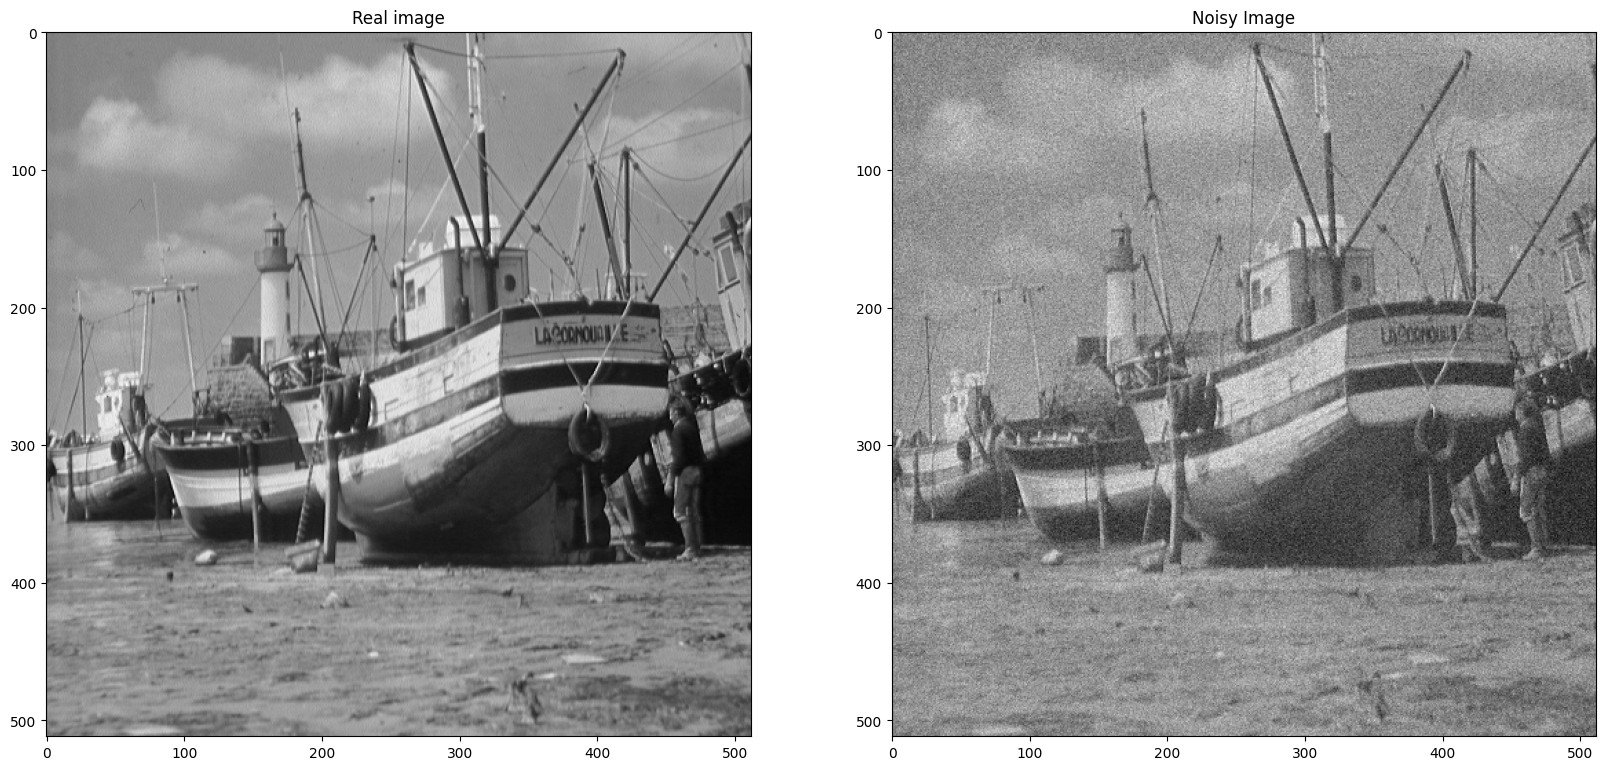

In [7]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 12))
ax1.imshow(image_real, cmap = "gray")
ax1.set_title("Real image")
ax2.imshow(image_noisy, cmap = "gray")
ax2.set_title("Noisy Image")

Next, let us define `im_fwd_gradient` and `im_bwd_divergence` functions to implement the forward gradient and backward divergence operations, as we have already studied them in previous labs.

In [8]:
def im_fwd_gradient(image: np.ndarray):
    """
    Discrete gradient of an image using forward differences, with homogeneous Neuman boundary conditions.

    :param u: image (MxN)

    :return gradu_j: partial derivative in the j (rows) direction (also x direction)
    :return gradu_i: partial derivative in the i (cols) direction (also y direction)
    """
    # Get the size of the image
    image_shape = image.shape

    # Calculate both gradients
    gradu_j = np.append(np.diff(image, axis = 1), np.zeros((image_shape[0], 1)), axis = 1)
    gradu_i = np.append(np.diff(image, axis = 0), np.zeros((1, image_shape[1])), axis = 0)
    return gradu_i, gradu_j

def im_bwd_divergence(gradient_i: np.ndarray,
                      gradient_j: np.ndarray):
    """
    Discrete divergence of a vector field using backwards differences.
    This is the negative transpose of the im_fwd_gradient

    :param gradient_i: component of g in the direction j (rows) (also x direction)
    :param gradient_j: component of g in the direction i (cols) (also y direction)

    :return divg: backwards divergence of g
    """
    # Backwards j partial derivative of gradient_j
    gradient_j[:, gradient_j.shape[1] - 1] = 0
    divg = np.diff(np.append(np.zeros((gradient_j.shape[0], 1)), gradient_j, axis = 1), axis = 1)

    # Backwards i partial derivative of gradient_i
    gradient_i[gradient_i.shape[0] - 1, :] = 0
    divg = np.diff(np.append(np.zeros((1, gradient_i.shape[1])), gradient_i, axis = 0), axis = 0) + divg

    return divg


## Primal-dual problem

In a primal-dual scheme we look for a saddle point $(u^*, p^*)$ of $G$. A saddle-point is a minimum in $u$ and a maximum in $p$. To find it we do an iterative scheme, updating $u$ using a gradient descent and $p$ with a gradient ascent. Using the formulas derived in the previous part we have that:
$$
\nabla_p G(u,p) = \nabla ^+ u,
$$
$$
\nabla_u G(u,p) = -\mathrm{div}^-p + \frac{1}{\lambda}(u-f).
$$

Given an initialization $u^0,p^0$ , and time step parameters $\delta$, $\theta>0$, the primal-dual scheme is as follows:

$$u^{k+1}=u^k - \theta (\frac{1}{\lambda}(u^k-f) - \mathrm{div}^-p^k) $$
$$p^{k+1} = P_C(p^k + \delta \nabla^+ u^{k+1})$$

Note that since $p$ is constrained to the set $C$, we have to use a projected gradient ascent.

<font color='blue'>**(QUESTION 1)** Complete the function `rof_primal_dual`. Do not use Python loops. Follow the comments provided in the code.
</font>

In [9]:
def rof_primal_dual(f: np.ndarray,
                    lambda_: float,
                    pd_prms: dict,
                    fig, ax1, ax2):
    """
    rof_primal_dual - minimizes the ROF denoising energy using a primal-dual
                      scheme to solve the min-max problem.

    :param f      : MxN noisy image
    :param lambda : weight between regularization and data attachement term
    :param pd_prms: dictionary with parameters of primal dual method:
                    delta     : dual gradient ascent step size
                    theta     : primal gradient descent step size
                    max_iters : maximum number of iterations
                    tolerance : tolerance on dual gap for the stopping condition

    :return u  : primal value found (MxN)
    :return p_i: dual optimum, horizontal component (MxN)
    :return p_j: dual optimum, vertical   component (MxN)
    :return fps: evolution of the primal function (vector of length total_iters)
    :return fds: evolution of the dual   function (vector of length total_iters)
    """

    # Get the params
    max_iters = pd_prms.get("max_iters")
    tolerance = pd_prms.get("tolerance")
    delta     = pd_prms.get("delta")
    theta     = pd_prms.get("theta")
    sz = f.shape # M = sz(1), N = sz(2)

    # initialize primal variable
    u = f

    # initialize dual variable (a vector valued image)
    p_j = np.zeros(sz)
    p_i = np.zeros(sz)
    div_p = im_bwd_divergence(p_i, p_j)

    # grad of f, needed later
    gf_i, gf_j = im_fwd_gradient(f)

    # vectors with function values
    fps = []
    fds = []

    it = 0
    dual_gap = np.inf
    while (dual_gap > tolerance) and (it < max_iters):

        # Update the iteration counter
        it += 1

        # TODO: update primal variable with a gradient descent step
        u = u - theta*((1/lambda_)*(u-f)-div_p)
        gu_i, gu_j = im_fwd_gradient(u)

        # TODO: gradient ascent on dual variable
        p_i = p_i + delta*gu_i
        p_j = p_j + delta*gu_j

        # TODO: project over the feasible set. Do not use Python loops
        power_pi = np.power(p_i,2)
        power_pj = np.power(p_j,2)
        norm = np.sqrt(power_pi+power_pj)
        max = np.maximum(np.ones(sz),norm)
        p_i = p_i/max
        p_j = p_j/max

        # TODO: update divergence of dual variable p
        div_p = im_bwd_divergence(p_i, p_j)

        # TODO primal energy
        power_gui = np.power(gu_i, 2)
        power_guj = np.power(gu_j, 2)
        PE = np.sqrt(power_gui + power_guj).sum()
        PE = PE + 1/(2*lambda_)*np.power(u-f, 2).sum()

        # TODO: dual energy
        DE = (gf_i * p_i).sum() + (gf_j * p_j).sum() - \
             lambda_/2 * (div_p ** 2).sum()

        # we normalize the energies between the number of pixels
        PE = PE / np.prod(sz)
        DE = DE / np.prod(sz)

        # dual gap
        dual_gap = PE - DE

        fps.append(PE)
        fds.append(DE)

        # Plot
        if it % 10 == 0:
            # display primal and dual variable
            ax1.imshow(u, cmap = "gray")
            ax2.imshow(np.concatenate((p_i, p_j), axis = 1), cmap = "gray")
            clear_output(wait=True)
            display(fig)

            # display information - dual gap
            print("[it {0} of {1}] DG = {2} - {3} = {4}".format(it, max_iters, PE, DE, dual_gap))

    return u, p_i, p_j, fps, fds

### Run the primal-dual algorithm

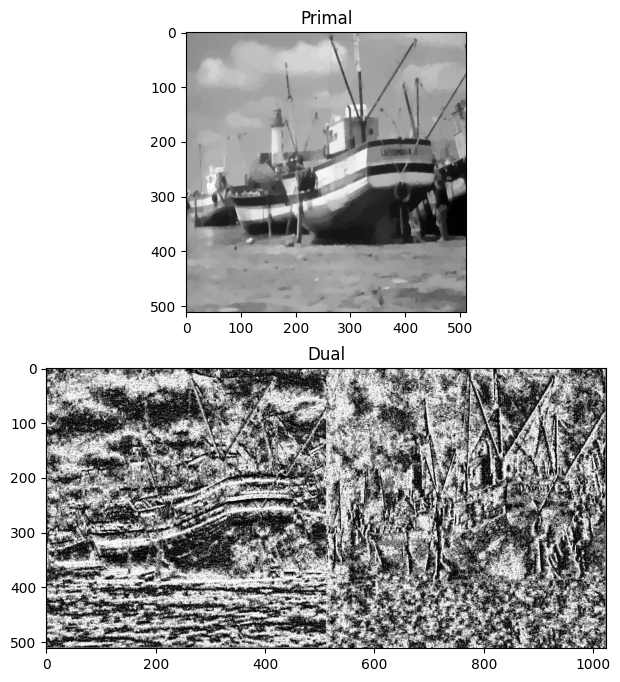

[it 500 of 500] DG = 11.642332774724155 - 11.642183412111793 = 0.00014936261236186965


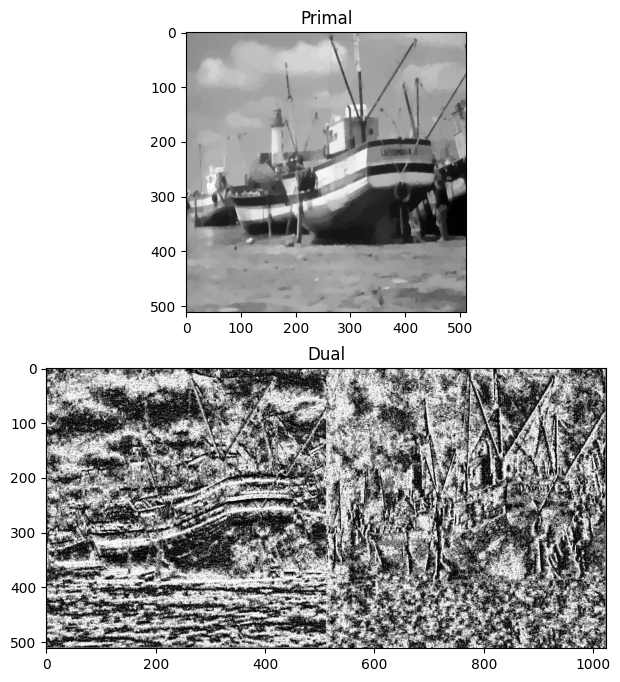

In [16]:
# Define the parameters
lambda_ = 30
pd_prms = {"max_iters": 500,
            "tolerance": 1e-4,
            "delta": 1/2,
            "theta": 1/2
           }

# Build up the plot
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, figsize = (14, 8))
ax1.set_title("Primal")
ax2.set_title("Dual")

# Run the primal dual
_, _, _, fps, fds = rof_primal_dual(image_noisy, lambda_, pd_prms, fig, ax1, ax2)
fps1 = fps
fds1 = fds


## The dual algorithm

The objective again is to solve the max-min problem:

$$\max \limits_{p\in C} \min\limits_{u} G(u,p) = \langle \nabla^+ u,p \rangle_{\mathcal{Y}} + \frac{1}{2 \lambda} \|u-f\|^2_\mathcal{X}$$

The interior minimization problem with respect to u is easy to solve: it is a quadratic unconstrained problem. Thus, we can compute the minimum $u^*(p)$ as a function of $p$. From the previous part we get that

$$u^*(p) = f + \lambda \mathrm{div}^- p$$

Now we compute the dual energy as $E_D(p) = \min_u G(u, p) = G(u^*(p), p)$. The dual scheme is a projected gradient ascent on the dual energy $E_D$. Again, from the previous part we have that

$$E_D(p) = \langle \nabla^+ f,p\rangle_\mathcal{Y} - \frac{\lambda}{2} \|\mathrm{div}^-p\|^2_\mathcal{X}$$

Taking the gradient we obtain:

$$\nabla E_D (p) = \nabla ^+f+ \lambda \nabla^+ \mathrm{div}^- p = \nabla ^+ (f+\lambda \mathrm{div}^- p) = \nabla ^+ u^* (p).$$

Putting all together, we have the following projected gradient ascent scheme to
maximize the dual energy, where $\delta$ is the step of the gradient ascent:

$$p^{k+1} = P_C(p^k + \delta \nabla^+(f+\lambda \mathrm{div}^-(p^k))$$

The projection operator is the same as before. Note that the dual scheme does not need the computation of the primal variable. **It only works on the dual domain.** Once the dual maximization finishes, we obtain $p^*$, and then we can compute the primal optimum as $u^*(p^*)$. In practice we will use the following scheme, which is exactly equivalent to the previous one, with the only difference that we identify the primal variable explicitly:

$$
\left\{
  \begin{array}{l}
  u^*(p^k) = f + \lambda \mathrm{div}^-p^k  \\
p^{k+1} = P_C(p^k + \delta \nabla^+u^*(p^k))
  \end{array}
\right.$$

In this way we can compute the primal energy (and thus the dual gap) and visualize the evolution of the image during the iterations.

<font color='blue'>**(QUESTION 2)** Complete the function `rof_dual`. Follow the comments provided in the code. Do not use Python loops.
</font>

In [11]:
def rof_dual(f: np.ndarray,
             lambda_: float,
             pd_prms: dict,
             fig, ax1, ax2):
    """
    rof_dual - minimizes the ROF denoising energy using Chambolle's dual
               projected gradient ascent.

    :param f     : MxN noisy image
    :param lambda: weight between regularization and data attachement term
    :param d_prms: dictionary with parameters of dual method:
                   delta     : gradient ascent step size
                   max_iters : maximum number of iterations
                   tolerance : tolerance on dual gap for the stopping condition

    :return u   : primal value found (MxN)
    :return xi_j: dual optimum, horizontal component (MxN)
    :return xi_i: dual optimum, vertical   component (MxN)
    :return fps : evolution of the primal function (vector of length total_iters)
    :return fds : evolution of the dual   function (vector of length total_iters)
    """

    # Get the params
    max_iters = pd_prms.get("max_iters")
    tolerance = pd_prms.get("tolerance")
    delta     = pd_prms.get("delta")
    sz = f.shape

    # initialize dual variable (a vector valued image)
    p_j = np.zeros(sz)
    p_i = np.zeros(sz)
    div_p = im_bwd_divergence(p_i, p_j)

    # grad of f, needed later
    gf_i, gf_j = im_fwd_gradient(f)

    # vectors with function values
    fps = []
    fds = []

    it = 0
    dual_gap = np.inf
    while (dual_gap > tolerance) and (it < max_iters):

        # Update the iteration counter
        it += 1

        # TODO: update primal variable and its gradient - this is u^*(xi) for current xi
        u_star = f + lambda_*div_p
        gu_star_i, gu_star_j = im_fwd_gradient(u_star)

        # TODO: update dual variable - gradient ascent
        p_i = p_i + delta*gu_star_i
        p_j = p_j + delta*gu_star_j

        # TODO: project over the feasible set
        power_pi = np.power(p_i,2)
        power_pj = np.power(p_j,2)
        norm = np.sqrt(power_pi+power_pj)
        max = np.maximum(np.ones(sz),norm)
        p_i = p_i/max
        p_j = p_j/max

        # TODO: update divergence of dual
        div_p = im_bwd_divergence(p_i, p_j)

        # TODO: primal energy
        power_gui = np.power(gu_star_i, 2)
        power_guj = np.power(gu_star_j, 2)
        PE = np.sqrt(power_gui + power_guj).sum()
        PE = PE + 1/(2*lambda_)*np.power(u_star-f, 2).sum()

        # TODO: dual energy
        DE = (gu_star_i * p_i).sum() + (gu_star_j * p_j).sum() - \
             lambda_/2 * np.power(np.linalg.norm(div_p),2)

        # we normalize the energies between the number of pixels
        PE = PE / np.prod(sz)
        DE = DE / np.prod(sz)

        # dual gap
        dual_gap = PE - DE

        fps.append(PE)
        fds.append(DE)

        # Plot
        if it % 10 == 0:
            # display primal and dual variable
            ax1.imshow(u_star, cmap = "gray")
            ax2.imshow(np.concatenate((p_i, p_j), axis = 1), cmap = "gray")
            clear_output(wait=True)
            display(fig)

            # display information - dual gap
            print("[it {0} of {1}] DG = {2} - {3} = {4}".format(it, max_iters, PE, DE, dual_gap))

    return u_star, p_i, p_j, fps, fds

### Run the dual algorithm

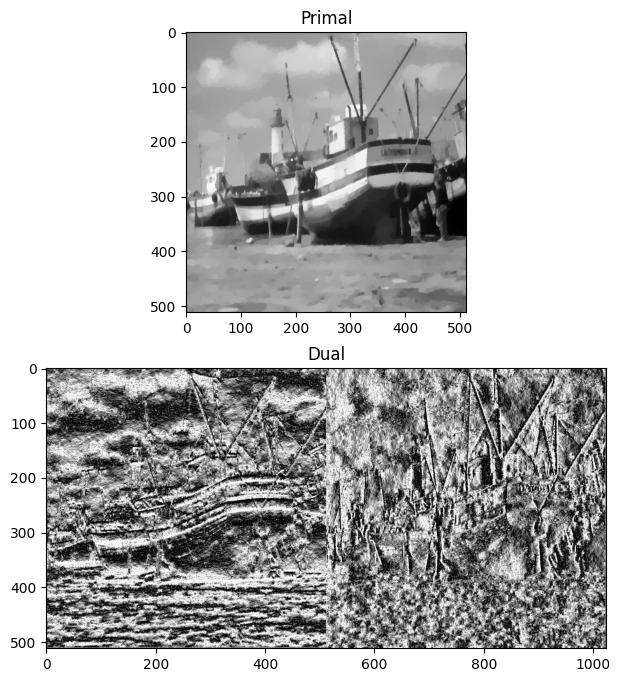

[it 500 of 500] DG = 11.650058671549889 - -3.871677241216264 = 15.521735912766154


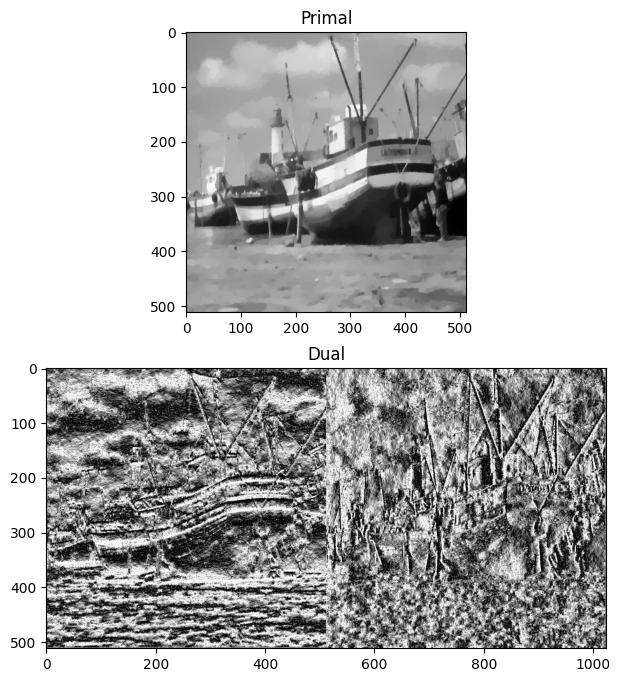

In [15]:
# Define the parameters
lambda_ = 30
pd_prms = {"max_iters": 500,
            "tolerance": 1e-4,
            "delta": 1/4.5 / lambda_
           }

# Build up the plot
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, figsize = (14, 8))
ax1.set_title("Primal")
ax2.set_title("Dual")

# Run the primal dual
_, _, _, fps, fds = rof_dual(image_noisy, lambda_, pd_prms, fig, ax1, ax2)
fps2 = fps
fds2 = fds

<font color='blue'>Try different values of $\lambda$. Answer (briefly) the following questions.
</font>

<font color='blue'>**(QUESTION 3.1)** What is the effect of $\lambda$ on the results?
</font>

<font color='red'>**ANSWER**</font>

<font color='red'>In ROF $\lambda$ is a parameter that tunes the amount of noise in an image. Therefore, if we have small $\lambda$, we will have small noise removal, the resulting image is more blurry and u is closer to f, whereas if we have bigger $\lambda$, the noise removal is bigger, the image is sharper and we have a more blurry image.

<font color='blue'>**(QUESTION 3.2)** Compare the quality of the results obtained with those obtained in Lab 2. Are the edges of the image well preserved?
</font>

<font color='red'>**ANSWER**</font>

<font color='red'> By comparing the results obtained using ROF image denoising to those from lab 2, where we used gradient image denoising, we can notice that the main difference lies in the balance that ROF achieves between noise reduction and edge preservation. While gradient denoising smooths the entire image, making it sharper but with less texture, ROF can balance this out by effectively reducing noise while preserving important edges adjusting the value of $\lambda$.

<font color='red'> We can see that if we choose a $\lambda$ that is too large, the edges of the images become blurrier. By decreasing the $\lambda$, we preserve the sharpness of the edges.

<font color='blue'>**(QUESTION 3.3)** Plot in a same graph the evolution of the dual gap with the iterations for both methods (the dual and the primal dual). Use a logarithmic axis for the dual gap (you can use the function `semilogy` instead of `plot`). Which method converges faster? What happens when you change step size $\delta$?
</font>

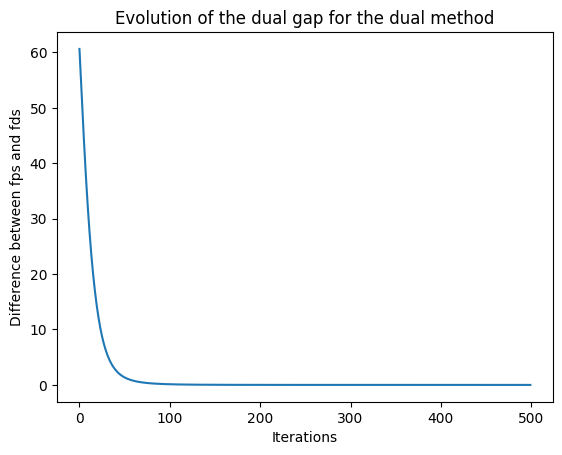

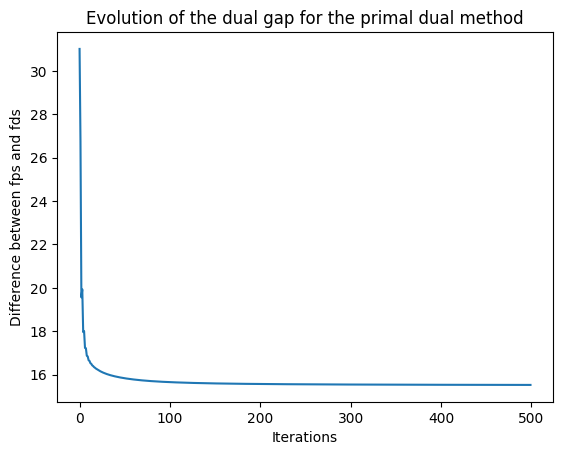

In [20]:
difference1 = np.array(fps1) -np.array(fds1)
difference2 = np.array(fps2) -np.array(fds2)

plt.plot(difference1)
plt.xlabel('Iterations')
plt.ylabel('Difference between fps and fds')
plt.title('Evolution of the dual gap for the dual method')
plt.show()

plt.plot(difference2)
plt.xlabel('Iterations')
plt.ylabel('Difference between fps and fds')
plt.title('Evolution of the dual gap for the primal dual method')
plt.show()

<font color='red'>**ANSWER**</font>

<font color='red'> Firstly, we can clearly see that the primal-dual method converges much faster, which makes sense as it  balances the updates between primal and dual variables more efficiently.

<font color='red'> Moreover, when changing the step size $\delta$ in the ROF model, it significantly affects both the convergence speed and stability of the algorithm. A smaller step size leads to slower convergence because the algorithm makes finer adjustments in each iteration, which can result in more accurate final results, and a larger step size can accelerate convergence but may also cause instability and divergence if the step size is too large.